# ionsat power

In [1]:
import sys
sys.path.append("../..")

In [2]:
import space_mission_design
from space_mission_design.celestlab import celestlab_wrapper
from space_mission_design.visualisation import ploting_map

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("presentation")


In [3]:
! pip install cartopy

In [4]:

from astropy import units as u

from poliastro.bodies import Earth, Mars, Sun
from poliastro.twobody import Orbit
from tqdm.auto import tqdm
import os

from space_mission_design.power import body_illumination



Celestlab_loader=/home/tavant/Data/nextcloud/ao/CSE-perso/tools/space_mission_design/examples/loader_celestlab.sce /home/tavant/code/scilab-6.1.0/bin//scilab-cli
Small example : propagate and plot


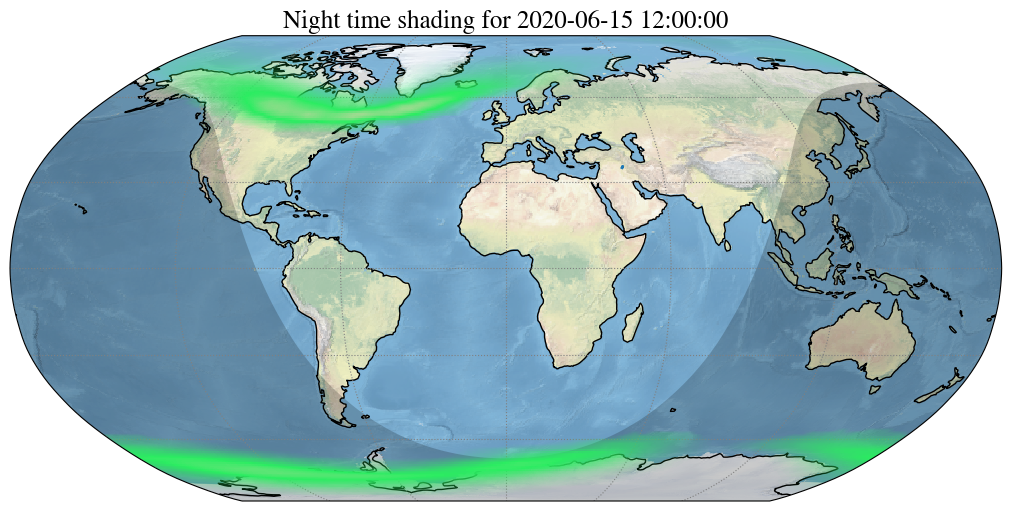

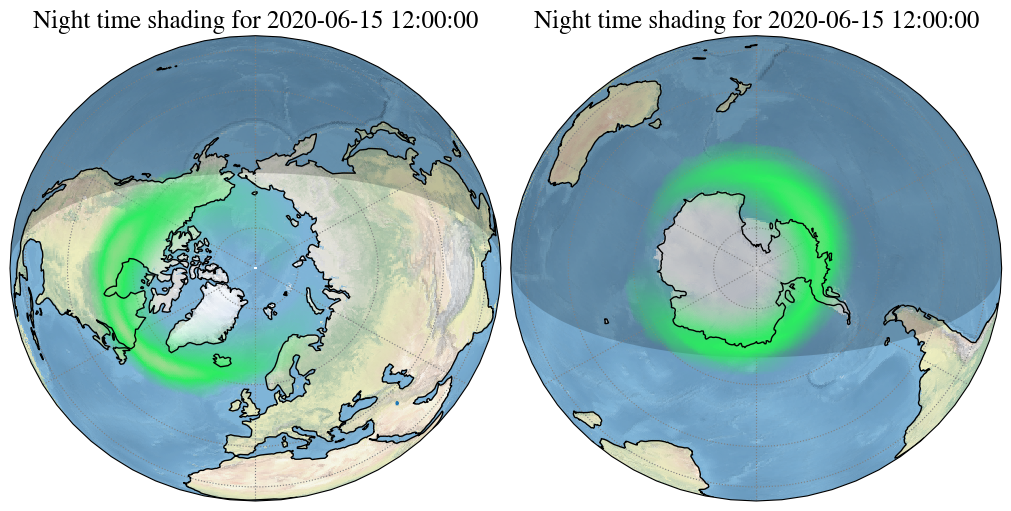

In [5]:
wrapper = celestlab_wrapper.WrapperCelestlab(scilab_path="/home/tavant/code/scilab-6.1.0/bin/",
                                             celestlab_loader="/home/tavant/Data/nextcloud/ao/CSE-perso/tools/space_mission_design/examples/loader_celestlab.sce")

print("Small example : propagate and plot")
specitic_params = {"year":2024, "hour":12, "inc": 51*np.pi/180, "sma": (Earth.R_mean + 300 * u.km).to(u.m).value,
                   "outputFileName":"results_ionsat.h5" }

wrapper.write_paramerter_file(specitic_params)
wrapper.launch_celestlab("ionsat_power.sce")

sun_position, ecf_position, eclipses, cj_date = wrapper.read_celestlab_results("results_ionsat.h5")

ploting_map.plot_planisphere(ecf_position)

ploting_map.plot_poles(ecf_position)
plt.show()
# plt.savefig("map_51deg.png", dpi=300)


# Betta angle

In [13]:
specitic_params = {"year":2024,
                   "hour":12,
                   "inc": 51*np.pi/180,
                   "sma": (Earth.R_mean + 300 * u.km).to(u.m).value,
                   "timestep" : 1,
                   "number_days" : 356,
                   "outputFileName":"mean_eclipses_with_time.h5" }

wrapper.write_paramerter_file(specitic_params)
wrapper.launch_celestlab("mean_eclipses_with_time.sce")

results_beta, results_eclips, cjd = wrapper.read_celestlab_results("mean_eclipses_with_time.h5", dataset_keys=["results_beta", "results_eclips"])

results_beta = results_beta[0]
results_eclips = results_eclips[0]

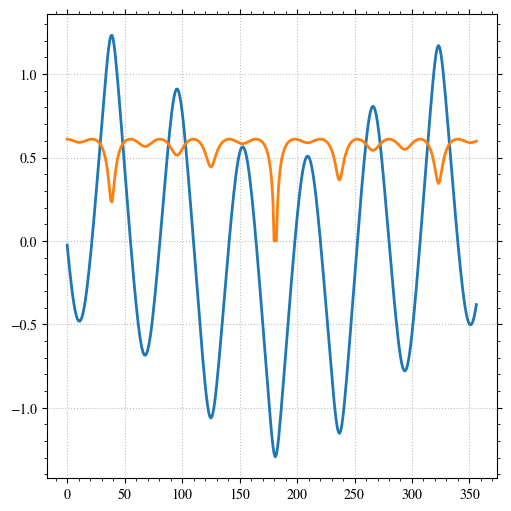

In [17]:
plt.figure()
plt.plot(cjd - cjd[0], results_beta)
plt.plot(cjd - cjd[0], results_eclips/3600)


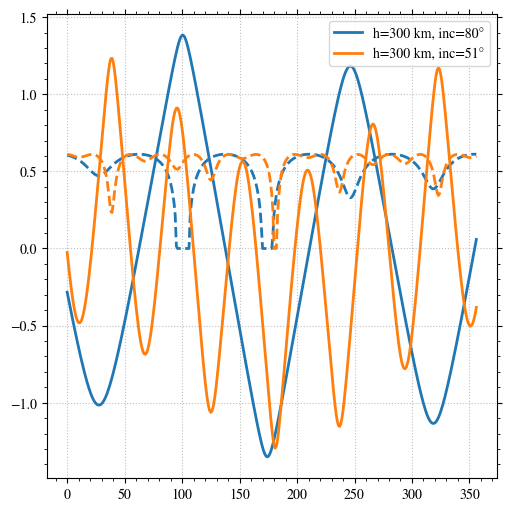

In [35]:
def plot_betta_and_eclipces( alt_km, inc_deg, hour = 12, ax=None):
    
    specitic_params = {"year":2024,
                   "hour":hour,
                   "inc": inc_deg*np.pi/180,
                   "sma": (Earth.R_mean + alt_km * u.km).to(u.m).value,
                   "timestep" : 1,
                   "number_days" : 356,
                   "outputFileName":"mean_eclipses_with_time.h5" }

    wrapper.write_paramerter_file(specitic_params)
    wrapper.launch_celestlab("mean_eclipses_with_time.sce")

    results_beta, results_eclips, cjd = wrapper.read_celestlab_results("mean_eclipses_with_time.h5", dataset_keys=["results_beta", "results_eclips"])

    results_beta = results_beta[0]
    results_eclips = results_eclips[0]
    
    if ax is None :
        fig, ax = plt.subplots(1,1)
    
    
    line, = ax.plot(cjd - cjd[0], results_beta, label= f"h={alt_km} km, inc={inc_deg}°")
    
    ax.plot(cjd - cjd[0], results_eclips/3600, linestyle="--", color=line.get_c())
    
    ax.legend()
    return ax
    
ax = plot_betta_and_eclipces( alt_km=300, inc_deg=80, hour = 12)
ax = plot_betta_and_eclipces( alt_km=300, inc_deg=51, hour = 12, ax=ax)
